 # Сведение задачи быстродействия к системе дифференциальных уравнений

## Формулировка задачи

Решается задача Лагранжа(47), с фиксированными концами:

$$\int_0^1 \ddot{x}^2 + \frac{48x}{1+ \alpha t^2} \rightarrow \operatorname{extr}$$
при $x(1) = \dot{x}(0) = 0$ и $\alpha \in \{ 0.0; 0.1; 1.0; 5.1\}$


## Необходимые условия минимума

Для сокращения записей все громоздкие вычисления в отчете не приводятся. Также автор позволяет себе неточность обозначений, не всегда выделяя элементы оптимального решения $\hat{x}$ по сравнению с неизвестными $x$.

Введем управление:
$$y = \dot{x}, \ \ u = \dot{y}$$

Тогда задача переписывается:

$$\int_0^1 u^2 + \frac{48x}{1+ \alpha t^2} \rightarrow \operatorname{extr}$$
при $x(1) = y(0) = 0$

Запишем функцию Лагранжа:

$$ \mathcal{L} = \int_{0}^{1} L dt + l $$

$$L = \lambda_{0} \left( u^2 + \frac{48x}{1+ \alpha t^2} \right) + p_1 (\dot{x} - y) + p_2 (\dot{y} - u)$$

$$l = \lambda_1 x(1) + \lambda_2 y(0)$$

И необходимые условия оптимальности:

1) система уравнений Эйлера:

$$- \dot{p}_1 - \frac{48\lambda_0}{1+ \alpha t^2} = 0$$

$$-\dot{p}_2 - p_1 = 0$$

2) условия трансверсальности по x_i: 

$$p_1(0) = 0; \ \ p_1(1) = -\lambda_1; \ \ \\
p_2(0) = \lambda_2; \ \ p_2(1) = 0; \ \ $$

3) условие минимума по $u$(слогаемые не зависящие от u пропущены):

$$u = \operatorname{argmin}_{u} (\lambda_0 u^2 - p_2 u) = \frac{p_2}{2\lambda_0}$$ 

4) условие неотрицательности $\lambda_0 \ge 0$

## Система дифференциальных уравнений

При $\lambda_0=0$ получаем $\lambda_1 = \lambda_2 = 0$, следовательно этот случай можно откинуть. Положим $\lambda_0 = 1/48$. Получаем систему:


\begin{matrix}
\dot{x}  &=& y \\ 
\dot{y} &=& 48 p_2 \\
\dot{p_2} &=& - p_1\\
\dot{p_1}  &=& - \frac{1}{1+\alpha t^2} \\
\end{matrix}

С краевыми условиями $x(1) = y(0) = p_1(0) = p_2(0) = 0$

Дополняя систему недостающими начальными условиями: 
$$x(0) = \alpha, \ \ p_2(0) = \beta$$
Получаем задачу Коши(отказываясь временно от граничных условий при $t = 1$),

## Аналитическое решение

$$\ddot{p_2} = \frac{1}{1+\alpha t^2}$$
Рассматривая случай $\alpha>0$:
$$p_2 = \frac{t \arctan\left(\sqrt{\alpha} t\right)}{\sqrt{\alpha}} -\frac{\log \left(\alpha t^2+1\right)}{2 \alpha} +c_1 t+c_2$$

$p_1(0) = \dot{p_2}(0) = 0 \Rightarrow$ $$c_1 = 0$$
$p_2(1) = 0 \Rightarrow$ $$c_1 = \frac{\arctan \left(\sqrt{\alpha}\right)}{\sqrt{\alpha}}-\frac{\log (\alpha+1)}{2 \alpha}$$

Итого:
$$p_2 = \frac{t \arctan\left(\sqrt{\alpha} t\right)  + \arctan \left(\sqrt{\alpha}\right)}{\sqrt{\alpha}} - 
\frac{\log \left(\alpha t^2+1\right) + \log (\alpha+1)}{2 \alpha} $$

Аналогично, для x, учитывая краевые условия получено(при помощи пакета Wolfram Mathematica):
$$x(t) = \frac{4}{\alpha^2} \left(5 \alpha t^2+3 \alpha t^2 \log (a+1)-3 \alpha t^2 \log \left(\alpha t^2+1\right)+\log \left(\alpha t^2+1\right)+ \\
+2 \sqrt{\alpha} t \left(\alpha t^2-3\right) \tan ^{-1}\left(\sqrt{\alpha} t\right)-2 \sqrt{\alpha} \left(\alpha \left(3 t^2-2\right)-3\right) \tan ^{-1}\left(\sqrt{\alpha}\right)-5 \alpha -\log (\alpha+1)\right)$$

Рассматривая случай $\alpha = 0$:
    $$x(t) = 2 \left(t^4-6 t^2+5\right)$$

# Вспомогательный код:

In [1]:
#вспомогательный код
from rahmodule import *
import numpy as np
import os
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [2]:
#полученная система дифференциальных уравнений:

def f1(t, X, a=0):
    x, y, p1, p2 = X
    #print(y, u_)
    
    xx1 = y
    xx2 = 48*p2
    pp2 = -p1
    pp1 = -1/(1+a*t**2)
    return np.array([xx1, xx2, pp1, pp2])

#аналитическое решение при \alpha=0
def analitic_func(t):
    return 2*(t**4 - 6*t**2+5)

In [3]:
#невязка
def X(x0, p20, f=f1, T=1, T_steps = 100, a = 0):
    y0, p10 = 0, 0
    Y = np.array([x0, y0, p10, p20])
    t_grid, ans, hs = solve(Y, T=T, T_steps=T_steps, a=a, f=f)
    X_ = [ans[-1][0], ans[-1][3]]
    
    #return np.append(X_, p1*x1*us[-1] + 1/6*(x2 - 4*x1)*(p1 - p2))
    return np.array(X_)

In [4]:
def save(point, ans, t_grid, alpha, pth):
    if not os.path.isdir(pth):
        os.mkdir(pth)
    
    with open(f"./{pth}/params.txt", 'w') as X__:
        X__.write(f"alpha: {alpha}, T points: {len(t_grid)}\n")
        X__.write(f"x0: {point[0]}, p20: {point[1]}\n")
        X__.write(f"Discrepancy: {[ans[-1][0], ans[-1][3]]}")
        
    
    with open(f"./{pth}/trajectory.txt", 'w') as X__:
            for i in range(len(t_grid)):  
                X__.write(f"{t_grid[i]}, {ans[i][0]}, {ans[i][1]}, {ans[i][2]}, {ans[i][3]} \n")
    

# Решение при $\alpha = 0$, сравнение с аналитическим. 

In [5]:
a = 0
point = newtonian_finder(X, [0, 0], dim=2, a=a)
y0 = [point[0], 0, 0, point[1]]
t_grid, ans, hs = solve(y0, 1, T_steps = 100, a = a, f = f1)

In [6]:
AN_SOL = []
for t in np.arange(0, 1+0.01, 0.01):
    AN_SOL.append(analitic_func(t))
AN_SOL = np.array(AN_SOL)

Аналитическое и численное решение на одном графике:

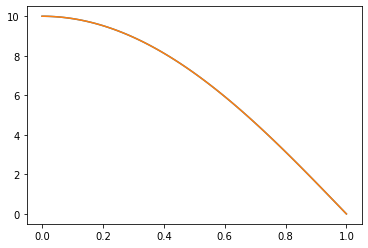

In [7]:
plt.plot(t_grid, np.array([np.array(ans).T[0], AN_SOL]).T)

Разница аналитического и точного решения:

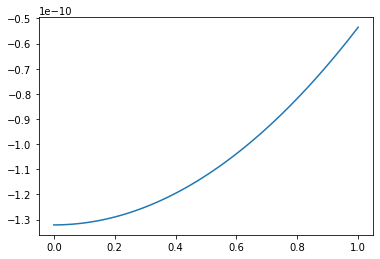

In [8]:
plt.plot(t_grid, np.array(ans).T[0] - AN_SOL)

In [9]:
save(point = point, ans=ans, t_grid=t_grid, alpha=a, pth="00")

# Остальные $\alpha$

При $\alpha = 0.1$, получены начальные условия: 
 $x(0) = 9.82065315702208$, $p_1 (0) = 9.82065315702208$
Невязка: [-5.3520438081378074e-11, 3.275364354737853e-12]
График численного решения:


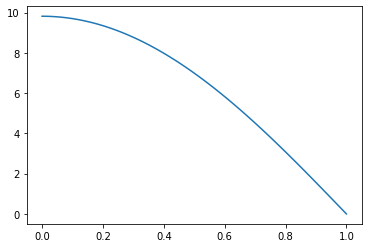

При $\alpha = 1$, получены начальные условия: 
 $x(0) = 8.643337811787305$, $p_1 (0) = 8.643337811787305$
Невязка: [-8.530476325319114e-11, 4.923145224822179e-13]
График численного решения:


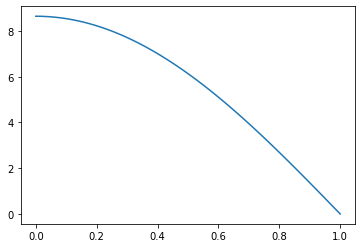

При $\alpha = 5.1$, получены начальные условия: 
 $x(0) = 6.380489685459042$, $p_1 (0) = 6.380489685459042$
Невязка: [6.9111383282915995e-15, -3.122502256758253e-17]
График численного решения:


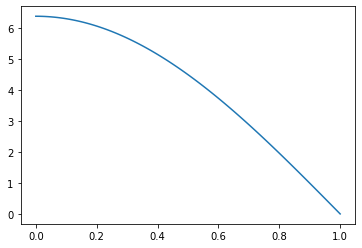

In [10]:
for a in [0.1, 1, 5.1]:
    point = newtonian_finder(X, [0, 0], dim=2, a=a)
    y0 = [point[0], 0, 0, point[1]]
    print(f"При $\\alpha = {a}$, получены начальные условия: \n $x(0) = {point[0]}$, $p_1 (0) = {point[0]}$")
    print(f"Невязка: {[ans[-1][0], ans[-1][3]]}") 
    t_grid, ans, hs = solve(y0, 1, T_steps = 100, a = a, f = f1)
    print("График численного решения:")
    plt.plot(t_grid, np.array(ans).T[0])
    plt.show()
    save(point = point, ans=ans, t_grid=t_grid, alpha=a, pth=f"{int(a*10)}")